Training Data Counts

In [21]:
import os
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from pathlib import Path
import random

In [20]:
def count_images_in_folders(data_path):
    folder_counts = {}
    
    # List all directories in the dataset path
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        
        # Check if it is a directory
        if os.path.isdir(folder_path):
            image_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
            folder_counts[folder] = image_count
    
    return folder_counts

# Define dataset path
data_path = Path("../../data/model/Patches/Train")

# Get image counts
image_counts = count_images_in_folders(data_path)

# Display the results
for folder, count in image_counts.items():
    print(f"Growth Stage : {folder} :- Image Count: {count}")

Growth Stage : tillering :- Image Count: 1992
Growth Stage : grand_growth :- Image Count: 3936
Growth Stage : ripening :- Image Count: 2006
Growth Stage : germination :- Image Count: 8282


Showing Raw, NDVI and NWDI images

In [27]:
def calculate_ndvi(nir_band, red_band):
    return (nir_band - red_band) / (nir_band + red_band + 1e-10)  # Avoid division by zero

def calculate_ndwi(nir_band, swir_band):
    return (nir_band - swir_band) / (nir_band + swir_band + 1e-10)

def display_stage_images(data_path, stage):
    stage_path = data_path / stage
    if not stage_path.exists() or not stage_path.is_dir():
        print(f"No directory found for stage: {stage}")
        return
    
    image_files = [f for f in stage_path.iterdir() if f.is_file()]
    if len(image_files) < 5:
        print(f"Not enough images in {stage} stage to select 5 random images.")
        return
    
    random_files = random.sample(image_files, 5)  # Select 5 random images
    
    plt.figure(figsize=(15, 10))
    for i, image_file in enumerate(random_files):
        with rasterio.open(image_file) as src:
            image = src.read()
            
            # Assuming bands are ordered as Red, NIR, SWIR
            red_band = image[0].astype(float)
            nir_band = image[1].astype(float)
            swir_band = image[2].astype(float)
            
            ndvi_image = calculate_ndvi(nir_band, red_band)
            ndwi_image = calculate_ndwi(nir_band, swir_band)
        
        plt.subplot(5, 3, i * 3 + 1)
        plt.imshow(red_band, cmap='gray')  # Show raw image as grayscale
        plt.title(f"{stage} - Raw Image (Red Band)")
        plt.axis("off")
        
        plt.subplot(5, 3, i * 3 + 2)
        plt.imshow(ndvi_image, cmap='RdYlGn')
        plt.title(f"{stage} - NDVI Image")
        plt.axis("off")
        
        plt.subplot(5, 3, i * 3 + 3)
        plt.imshow(ndwi_image, cmap='Blues')
        plt.title(f"{stage} - NDWI Image")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Define dataset path
data_path = Path("../../data/model/Patches/Train")


Germination Stage

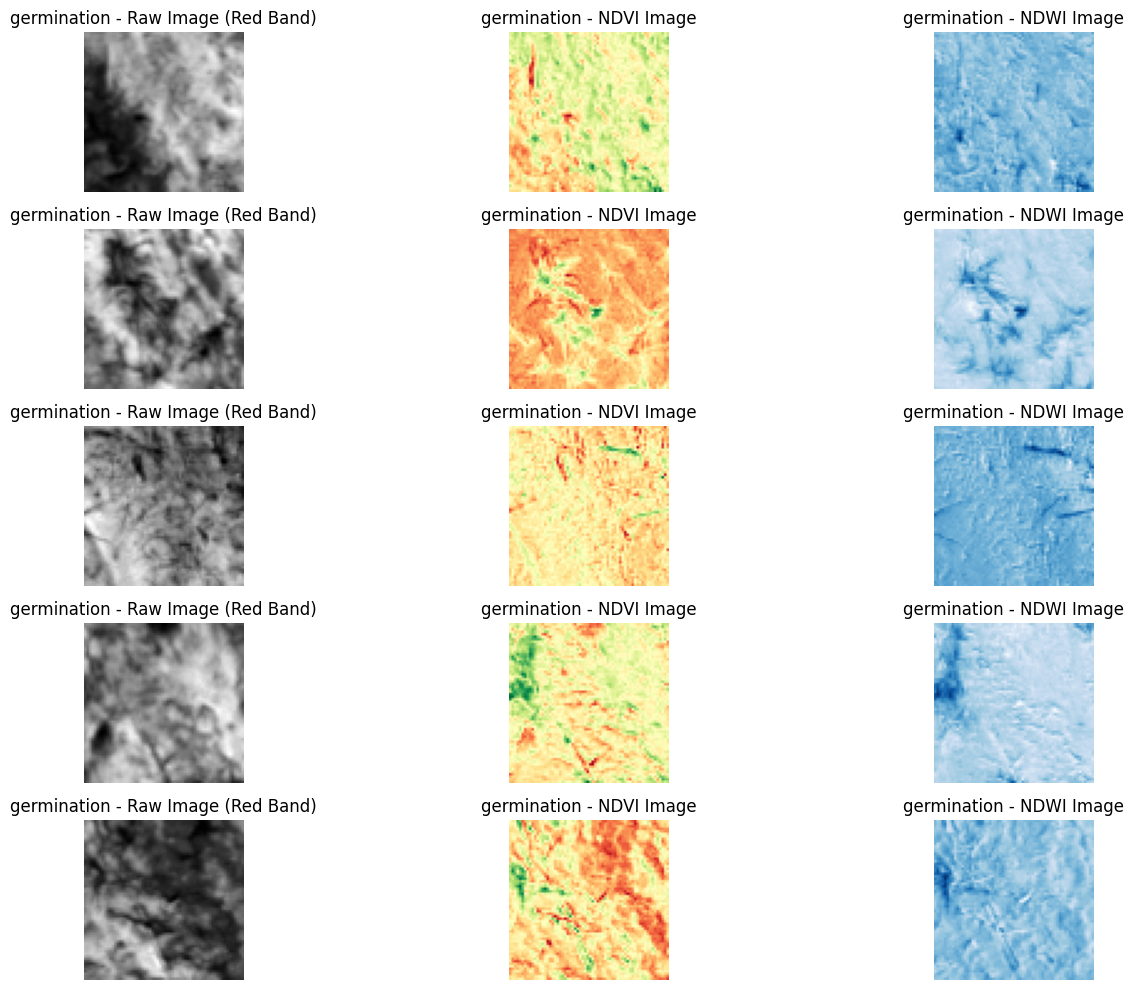

In [28]:
display_stage_images(data_path, "germination")

Tillering 

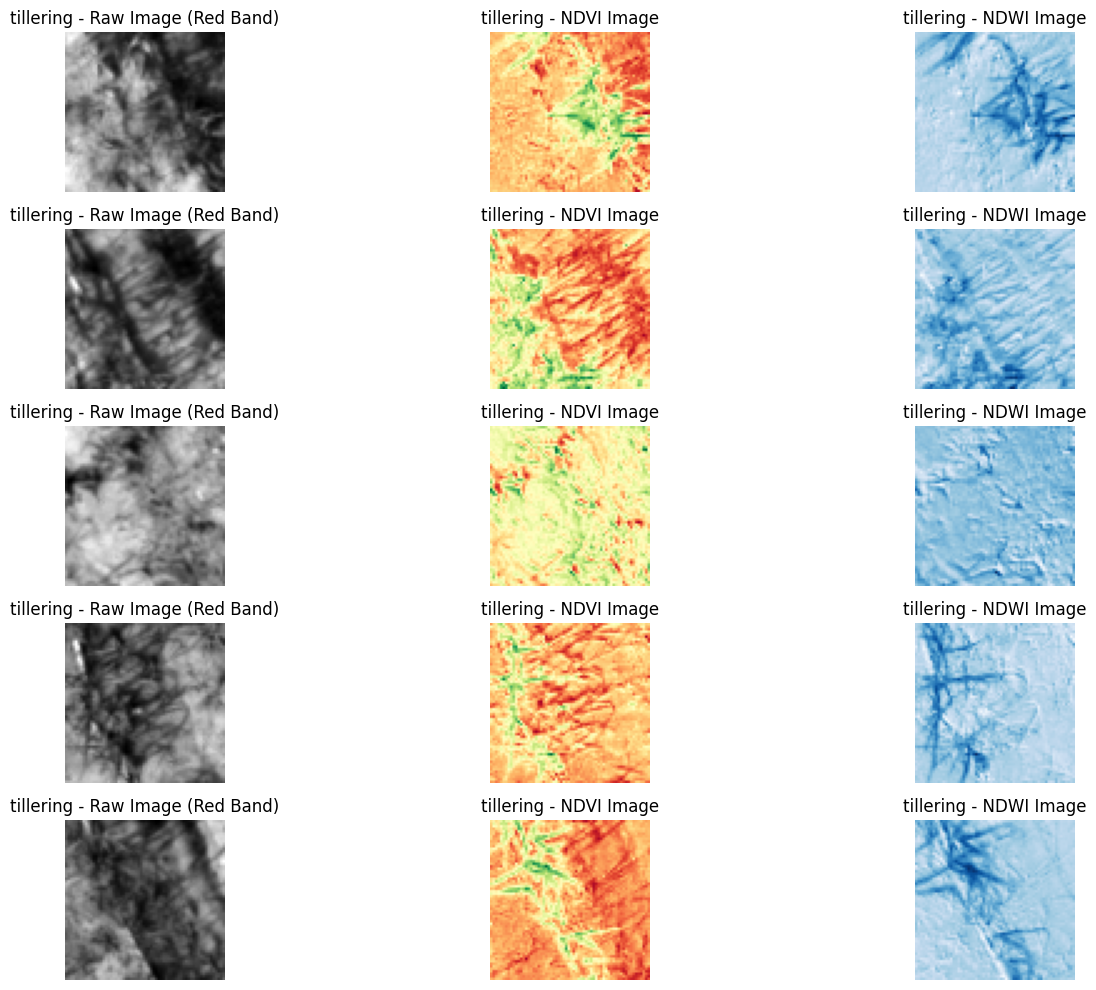

In [29]:
display_stage_images(data_path, "tillering")

Grand Growth

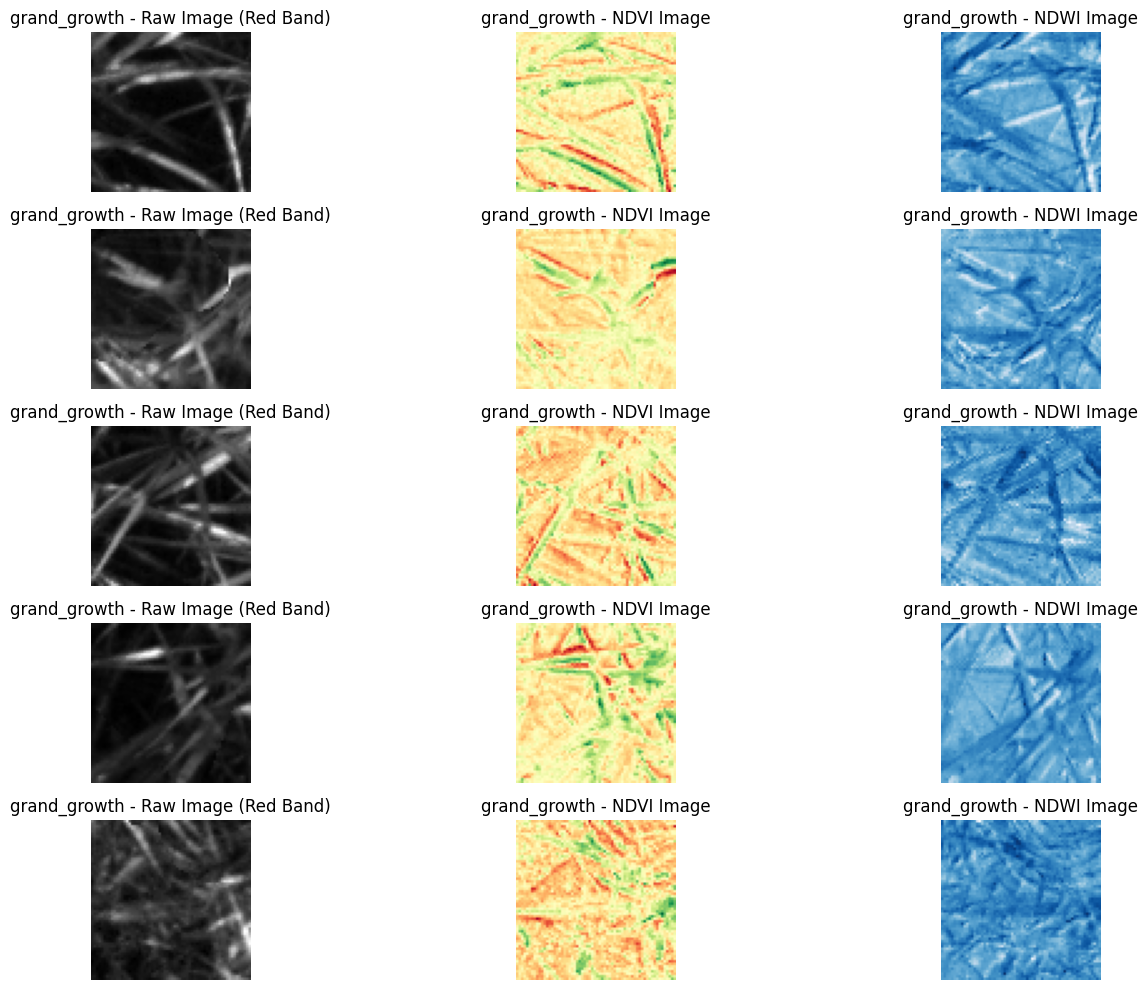

In [32]:
display_stage_images(data_path, "grand_growth")

Ripening 

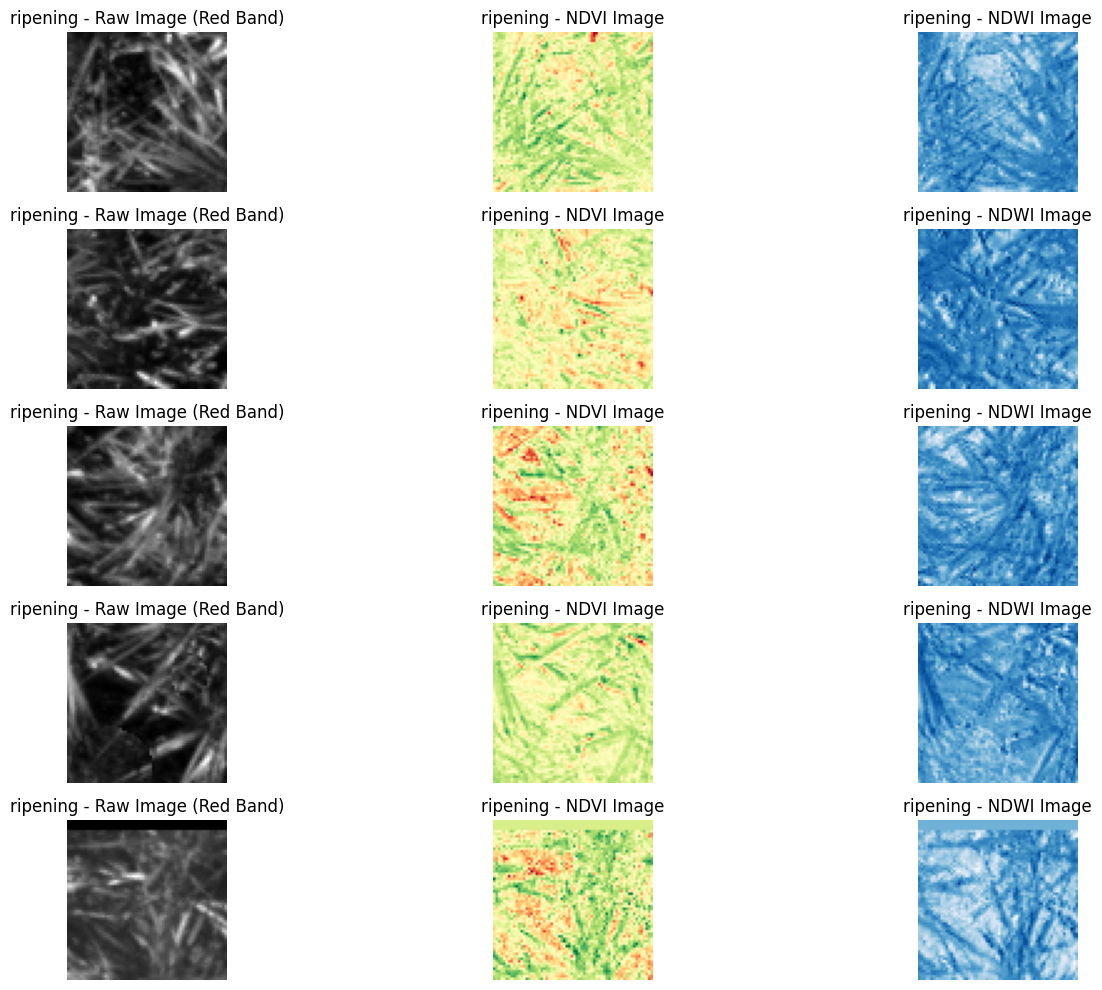

In [33]:
display_stage_images(data_path, "ripening")